In [2]:
import Pkg
# Pkg.activate("./dibs_env")
Pkg.activate("/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env")
ENV["PYTHON"]=""
Pkg.build("PyCall")

  Activating project at `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env`
    Building Conda ─→ `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/53b8b07b721b77144a0fbbbc2675222ebf40a02d/build.log`


In [3]:
using PyPlot

In [4]:
install_run = true
if install_run
    using Pkg
    Pkg.add(["Glob","FITSIO","Serialization", "HDF5", "DelimitedFiles"])
    Pkg.add(["StatsBase","Distributions","FreqTables", "LsqFit"])
    Pkg.add(["BinnedStatistics","KrylovKit","ImageTransformations"])
    Pkg.add(["DataFrames", "ProgressMeter", "Distributed", "BenchmarkTools"])
    Pkg.add(["Healpix", "SkyCoords", "WCS"])
    Pkg.add(["LaTeXStrings", "Formatting", "Printf", "PyFormattedStrings"])
    Pkg.add(["Conda","PyCall","PyPlot"])
end

#File Handling
using Glob, FITSIO, Serialization, HDF5, DelimitedFiles
# Stats
using StatsBase, LinearAlgebra, Distributions, FreqTables, LsqFit 
using BinnedStatistics, KrylovKit, ImageTransformations
# Computing
using DataFrames, ProgressMeter, Distributed, BenchmarkTools, Random
# Astro
using Healpix, SkyCoords, WCS
# Python Plotting Setup
using PyCall, LaTeXStrings, Formatting, Printf, PyFormattedStrings
import PyPlot; const plt = PyPlot
mpltk=pyimport("mpl_toolkits.axes_grid1")
patches=pyimport("matplotlib.patches")
mplcolors=pyimport("matplotlib.colors")
mplani = pyimport("matplotlib.animation");
cc=pyimport("colorcet")
pyimport("sys")."stdout" = PyTextIO(stdout)
pyimport("sys")."stderr" = PyTextIO(stderr);
#py"""
#from scipy.stats import binned_statistic_2d
#"""
plt.matplotlib.style.use("default")

    Updating registry at `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env/Project.toml`
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env/Project.toml`
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env/Project.toml`
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env/Manifest.toml`
   Resolving package versions...
  No Changes to `/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/dibs_env/Project.toml`
  No Changes to `/uufs/

In [6]:
andrew_dir = "/uufs/chpc.utah.edu/common/home/u6039752/scratch/zenodo/GaiaDIB/GaiaDIB_dat/"

star_msk, nansum = deserialize(andrew_dir*"priors/star_mask.jdat");

xmin0 = 8460
xmax0 = 8700
wavex = xmin0:0.1:xmax0
maxw = maximum(wavex[star_msk])
minw = minimum(wavex[star_msk])
;

In [7]:
basework = "/uufs/chpc.utah.edu/common/home/u6039752/scratch/working/"

"/uufs/chpc.utah.edu/common/home/u6039752/scratch/working/"

In [6]:
pwd()

"/uufs/chpc.utah.edu/common/home/sdss50/sdsswork/users/u6048534/andrew_files"

In [36]:
x = h5read("../gaia_output/output_HDF51.h5", "residuals");

In [37]:
x[star_msk,:]

2189×4000 Matrix{Float64}:
  0.00643259   -0.0430528   -0.00316914  …  -0.00791237   0.0197235
 -0.00148879   -0.071303    -0.0185834      -0.0151902    0.00663242
  0.00919075   -0.0818358   -0.0195066      -0.0272504   -0.0121021
  0.0256801    -0.0620134   -0.0124675      -0.0380403   -0.0203809
  0.0397899    -0.0188845   -0.014284       -0.0366312   -0.024429
  0.0293933     0.0343457   -0.0266584   …  -0.0183765   -0.0306127
  0.0179618     0.0531421   -0.0327095       0.00275746  -0.023574
 -0.00570071    0.0479738   -0.0254123       0.0159641   -0.00522265
 -0.0149654     0.0401657   -0.0114303       0.029716     0.0154134
 -0.0210587     0.0390168   -0.00228562      0.0383092    0.0178146
 -0.000227846   0.0241732   -0.00935533  …   0.0362563    0.00973219
  0.0315754     0.0062074   -0.0177838       0.0125506    0.0112914
  0.0472576    -0.0141673   -0.0189859      -0.0100735    0.019562
  ⋮                                      ⋱               
 -0.0351876     0.0379258   -0.

In [16]:
i = h5open("../processed_gaia_data.h5", "r") # Open it
i

🗂️ HDF5.File: (read-only) ../processed_gaia_data.h5

In [8]:
Vmat_star = h5read(basework*"/2022_11_28/priors/RVS_stellar_zeroweighted_kry_50_95_const.h5","Vmat")

Vmat_dust = h5read(basework*"/2022_11_28/priors/precomp_dust_2_analyticDeriv.h5","Vmat")
covdet = h5read(basework*"/2022_11_28/priors/precomp_dust_2_analyticDeriv.h5","covdet");

Vmat_star_2 = sqrt(Vmat_star * Vmat_star')
Vvec  = Vmat_dust[:,:,180,5]
Vvec_2 = sqrt(Vvec * Vvec');

In [9]:
size(Vmat_star)

(2189, 50)

In [10]:
fname = andrew_dir*"/priors/RVS_stellar_zeroweighted_kry_50_95_const.h5"
msk_inter = h5read(fname,"msk");
msk_stellar = convert.(Bool,msk_inter);

In [9]:
size(msk_stellar)

(999645,)

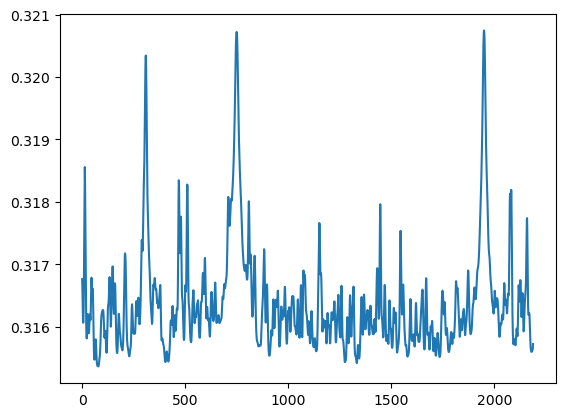

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15018b62ee00>

In [10]:
plot(Vmat_star[:,1])

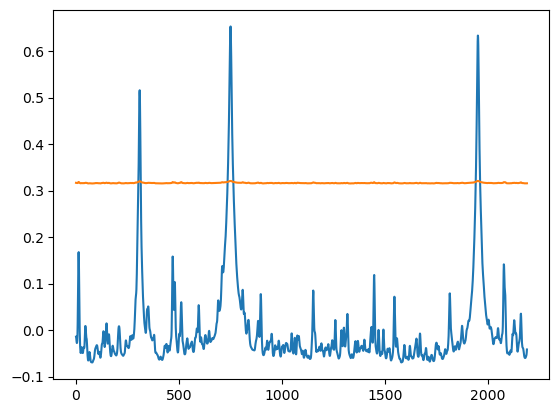

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14ff4d5f7850>

In [9]:
plot(Vmat_star[:,2])
plot(Vmat_star[:,1])

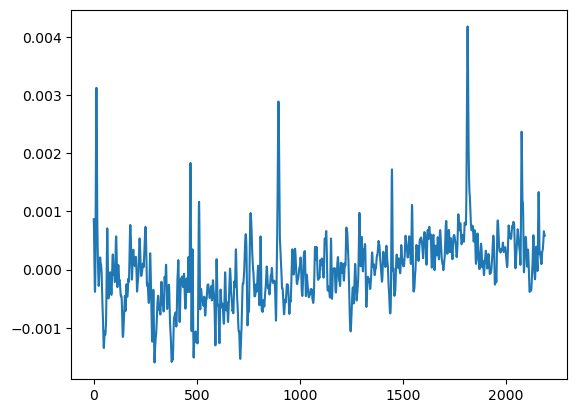

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14ff4d655f90>

In [10]:
plot(Vmat_star[:,12])

In [13]:
function sample_from_prior_aks(rng)
    pointed_down = false

    total_random_sample = zeros(2189)

    # noise_factor = 5 * 10^(-3 + 0.025*(ind - 1))
    this_noise_factor = 0.
    # this_noise_factor = rand(rng,Uniform(0.005, 0.05))

    while this_noise_factor == 0
        # this_noise_factor = rand(rng,Uniform(0.005, 0.007))
        this_noise_factor = rand(rng,Uniform(0.005, 0.05))

    end

    while ~pointed_down
        dist = Normal();
        rand1 = rand(rng,dist, 2189);
        rand2 = rand(rng,dist, 2189);
        global random_noise = rand(rng,dist, 2189)


        # println(size(Vmat_star_2))
        # random_star_prior_sample = Vmat_star * rand1;
        global random_star_prior_sample = Vmat_star_2 * rand1;
        global star_med = median(random_star_prior_sample)
        random_star_prior_sample .-= star_med
        random_star_prior_sample .+= 1
        # random_dust_prior_sample = Vvec * rand2;

        dust_pointed_down = false
        while ~dust_pointed_down
            rand2 = rand(rng,dist, 2189);
            random_dust_prior_sample = Vvec_2 * rand2;
            mean_dust = mean(random_dust_prior_sample)
            max_dust = maximum(random_dust_prior_sample)
            min_dust = minimum(random_dust_prior_sample)
            if abs(max_dust - mean_dust) < abs(mean_dust - min_dust)
                dust_pointed_down = true
            end
        end
        global random_dust_prior_sample = 2*Vvec_2 * rand2;


        ## noise weights spaced between 0.005 and 0.05ish
        # println(noise_factor)

        mean_val = mean(random_star_prior_sample)
        min_val = minimum(random_star_prior_sample)
        max_val = maximum(random_star_prior_sample)

        if abs(max_val - mean_val) < abs(mean_val - min_val)
            pointed_down = true
            total_random_sample = random_star_prior_sample + random_dust_prior_sample.*random_star_prior_sample + this_noise_factor * random_noise
            # total_random_sample = random_star_prior_sample + noise_factor * random_noise
        end
    end

    
    return total_random_sample, random_star_prior_sample, random_dust_prior_sample, this_noise_factor * random_noise, this_noise_factor, star_med
end

sample_from_prior_aks (generic function with 1 method)

In [14]:
rng = MersenneTwister(1234);

In [15]:
total_random_sample, random_star_prior_sample, random_dust_prior_sample, noise_sample, this_noise_factor, star_med = sample_from_prior_aks(rng);

In [16]:
this_noise_factor

0.031588008739956965

In [17]:
star_med

-0.1593141553844229

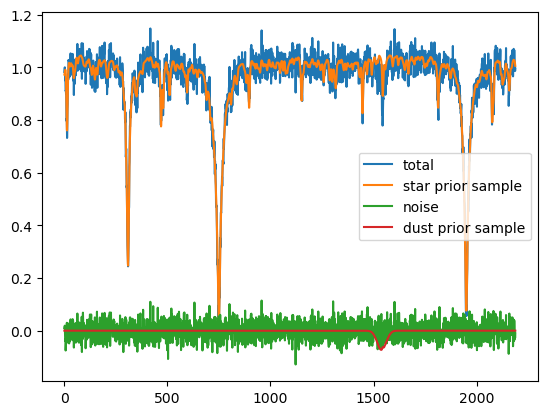

PyObject <matplotlib.legend.Legend object at 0x153bad915bd0>

In [19]:
plot(total_random_sample, label = "total")
plot(random_star_prior_sample, label = "star prior sample")
plot(noise_sample, label = "noise")
plot(random_dust_prior_sample.*random_star_prior_sample, label = "dust prior sample")
legend()

In [96]:
num_samples = 3000
total_samples = zeros(2189,num_samples)
star_samples = zeros(2189,num_samples)
dust_samples = zeros(2189,num_samples)
star_meds = zeros(num_samples)
noise_factors = zeros(num_samples)

fluxes = zeros(2189,num_samples)
dfluxes = zeros(2189,num_samples)



h5open("test_data.h5", "w") do file
    for i in 1:num_samples
        total_random_sample, random_star_prior_sample, random_dust_prior_sample, noise_sample, this_noise_factor, star_med = sample_from_prior_aks(rng);
        # print(size(total_random_sample))
        total_samples[:,i] = total_random_sample'
        star_samples[:,i] = random_star_prior_sample'
        dust_samples[:,i] = random_dust_prior_sample'
        star_meds[i] = star_med
        noise_factors[i] = this_noise_factor
        fluxes[:,i] = total_random_sample' .- star_med
        # fluxes[i,:] = ones(2401)
        dfluxes[:,i] = this_noise_factor * ones(2189)
    
    end

    write(file,"total_sample",total_samples)
    write(file,"star_sample",star_samples)
    write(file,"dust_sample",dust_samples)
    write(file,"star_med",star_meds)
    write(file,"noise_factor",noise_factors)
    write(file,"flux",fluxes)
    write(file,"dflux",dfluxes)
    # write(file,"total_sample",zeros(2, 2189))

end

Keep one same sample and just add more noise to it

In [104]:
nvec_dust = 2
    dind_dust = 1:(nvec_dust+1):(nvec_dust^2)

1:3:4

In [80]:
function sample_from_prior_const(rng)
    pointed_down = false

    total_random_sample = zeros(2189)

    # noise_factor = 5 * 10^(-3 + 0.025*(ind - 1))
    this_noise_factor = 0.
    while this_noise_factor == 0
        # this_noise_factor = rand(rng,Uniform(0.005, 0.007))
        this_noise_factor = rand(Uniform(0.005, 0.05))
    end
    
    # println(this_noise_factor)

    while ~pointed_down
        dist = Normal();
        rand1 = rand(rng,dist, 2189);
        rand2 = rand(rng,dist, 2189);
        global random_noise = rand(dist, 2189)
        # println("n17", random_noise[17])


        # println(size(Vmat_star_2))
        # random_star_prior_sample = Vmat_star * rand1;
        global random_star_prior_sample = (Vmat_star_2 * rand1) .* 0.5;
        global star_med = median(random_star_prior_sample)
        random_star_prior_sample .-= star_med
        random_star_prior_sample .+= 1
        # random_dust_prior_sample = Vvec * rand2;

        dust_pointed_down = false
        while ~dust_pointed_down
            rand2 = rand(rng,dist, 2189);
            random_dust_prior_sample = Vvec_2 * rand2;
            mean_dust = mean(random_dust_prior_sample)
            max_dust = maximum(random_dust_prior_sample)
            min_dust = minimum(random_dust_prior_sample)
            if abs(max_dust - mean_dust) < abs(mean_dust - min_dust)
                dust_pointed_down = true
            end
        end
        global random_dust_prior_sample = 2*Vvec_2 * rand2;


        ## noise weights spaced between 0.005 and 0.05ish
        # println(noise_factor)

        mean_val = mean(random_star_prior_sample)
        min_val = minimum(random_star_prior_sample)
        max_val = maximum(random_star_prior_sample)

        if abs(max_val - mean_val) < abs(mean_val - min_val)
            pointed_down = true
            total_random_sample = random_star_prior_sample + random_dust_prior_sample.*random_star_prior_sample + this_noise_factor * random_noise
            # total_random_sample = random_star_prior_sample + noise_factor * random_noise
        end
    end

    # println(star_med)
    
    return total_random_sample, random_star_prior_sample, random_dust_prior_sample, this_noise_factor * random_noise, this_noise_factor, star_med
end

sample_from_prior_const (generic function with 1 method)

In [81]:
rng2 = MersenneTwister(22);
total_random_sample, random_star_prior_sample, random_dust_prior_sample, noise_sample, this_noise_factor, star_med = sample_from_prior_const(rng2);

In [82]:
rng3 = MersenneTwister(1);

dist = Normal();
rand(rng3, dist, 1)

1-element Vector{Float64}:
 0.2972879845354616

In [83]:
rand(dist,1)

1-element Vector{Float64}:
 -0.04608260300447051

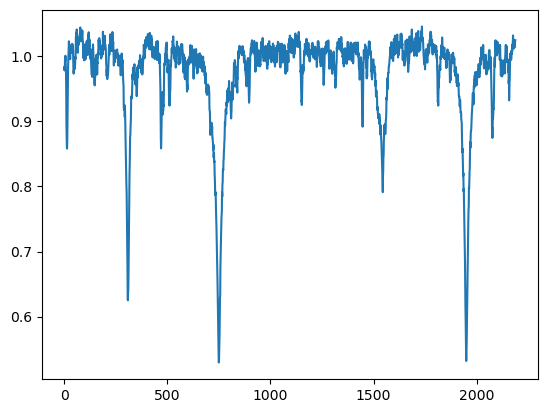

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14abbdeed270>

In [84]:
plot(total_random_sample)

In [85]:
num_samples = 300
total_samples = zeros(2189,num_samples)
star_samples = zeros(2189,num_samples)
dust_samples = zeros(2189,num_samples)
star_meds = zeros(num_samples)
noise_factors = zeros(num_samples)

fluxes = zeros(2189,num_samples)
dfluxes = zeros(2189,num_samples)



h5open("test_data_const_signal_2_half.h5", "w") do file
    for i in 1:num_samples
        rng2 = MersenneTwister(22);
        total_random_sample, random_star_prior_sample, random_dust_prior_sample, noise_sample, this_noise_factor, star_med = sample_from_prior_const(rng2);        # print(size(total_random_sample))
        total_samples[:,i] = total_random_sample'
        star_samples[:,i] = random_star_prior_sample'
        dust_samples[:,i] = random_dust_prior_sample'
        star_meds[i] = star_med
        noise_factors[i] = this_noise_factor
        fluxes[:,i] = (total_random_sample' .- star_med)
        # fluxes[i,:] = ones(2401)
        dfluxes[:,i] = this_noise_factor * ones(2189)
    
    end

    write(file,"total_sample",total_samples)
    write(file,"star_sample",star_samples)
    write(file,"dust_sample",dust_samples)
    write(file,"star_med",star_meds)
    write(file,"noise_factor",noise_factors)
    write(file,"flux",fluxes)
    write(file,"dflux",dfluxes)
    # write(file,"total_sample",zeros(2, 2189))

end

In [7]:
grvs = h5open("test_data.h5")
d = grvs["flux"]

🔢 HDF5.Dataset: /flux (file: test_data.h5 xfer_mode: 0)

In [13]:
size(d)

(2189, 3000)

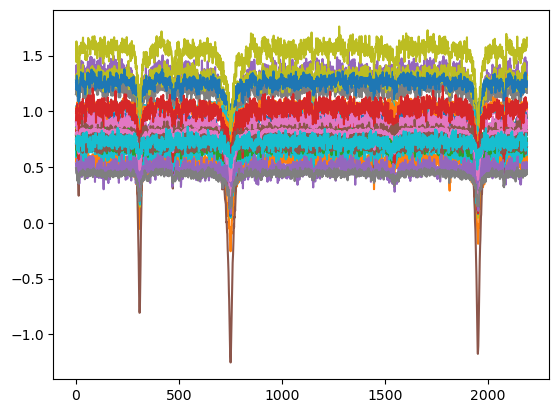

In [17]:
for i in 1:30
   plot(d[:,i*100])
end


In [121]:
close(grvs)

Using the same randomly sampled signal, but adding different noise levels to it

In [111]:
files_arr = []

for (root, dirs, files) in walkdir("../test_gaia_data2/")
    files_arr = joinpath.(root, files)
    break
    # operate_on_files(joinpath.(root, files)) # files is a Vector{String}, can be empty
end
noises = []
residuals2 = []
sample_means = []
stellar_components2 = []
i = 0
for file in files_arr
    μ_cd_mat_random = h5read(file,"μ_cd");
    μ_bd_mat_random = h5read(file,"μ_bd");
    # print(μ_cd_mat_random)
    # print((isnan(μ_bd_mat_random)))
    # noise_factors = h5read(file,"noise_factor");
    # sample_mean = h5read(file,"sampleMean");
    batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;
    # print(size(batch_residuals))
    # batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;

    # println(size(batch_residuals)," ", size(noise_factors))
    # noises = cat(noises, noise_factors, dims = 1)
    residuals2 = cat(residuals2, batch_residuals', dims = 1)
    stellar_components2 = cat(stellar_components2, μ_bd_mat_random', dims = 1)
    # sample_means = cat(sample_means, sample_mean, dims = 1)
end

In [112]:
files_arr = []

for (root, dirs, files) in walkdir("../test_gaia_data1/")
    files_arr = joinpath.(root, files)
    break
    # operate_on_files(joinpath.(root, files)) # files is a Vector{String}, can be empty
end

In [113]:
noises = []
residuals = []
sample_means = []
stellar_components = []
i = 0
for file in files_arr
    μ_cd_mat_random = h5read(file,"μ_cd");
    μ_bd_mat_random = h5read(file,"μ_bd");
    # print(μ_cd_mat_random)
    # print((isnan(μ_bd_mat_random)))
    # noise_factors = h5read(file,"noise_factor");
    # sample_mean = h5read(file,"sampleMean");
    batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;
    # print(size(batch_residuals))
    # batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;

    # println(size(batch_residuals)," ", size(noise_factors))
    # noises = cat(noises, noise_factors, dims = 1)
    residuals = cat(residuals, batch_residuals', dims = 1)
    stellar_components = cat(stellar_components, μ_bd_mat_random', dims = 1)
    # sample_means = cat(sample_means, sample_mean, dims = 1)
end

In [114]:
size(residuals)

(200, 2401)

In [115]:
# noises = h5read("test_gaia_data1.h5","noise_factor");

# ps1 = sortperm(noises);
# println(size(ps1))
# sorted_noises = noises[ps1];

# sorted_residuals = residuals[ps1,star_msk];
# sorted_stellar_components = stellar_components[ps1, star_msk];

In [116]:
size(residuals')

(2401, 200)

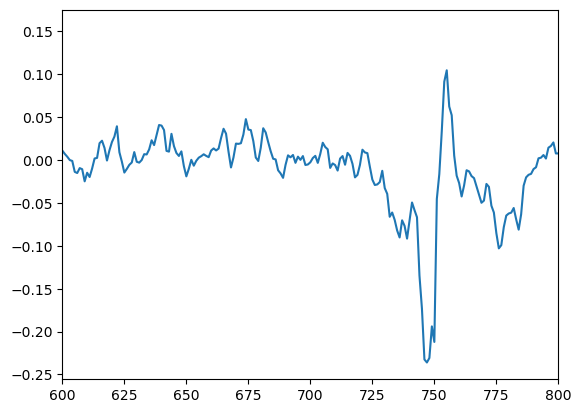

(600.0, 800.0)

In [117]:
plot(median(residuals2[:,star_msk],dims =1)')
xlim(600,800)

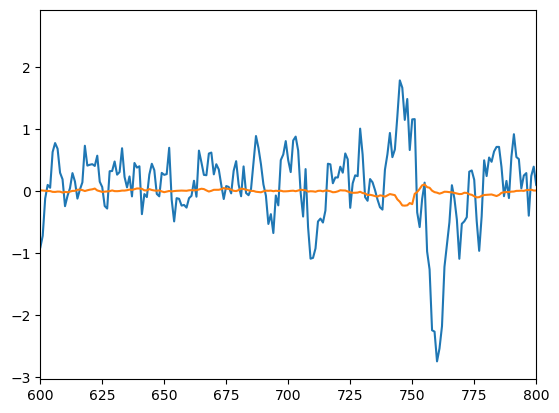

(600.0, 800.0)

In [118]:
plot(median(residuals[:,star_msk],dims =1)')
plot(median(residuals2[:,star_msk],dims =1)')

xlim(600,800)

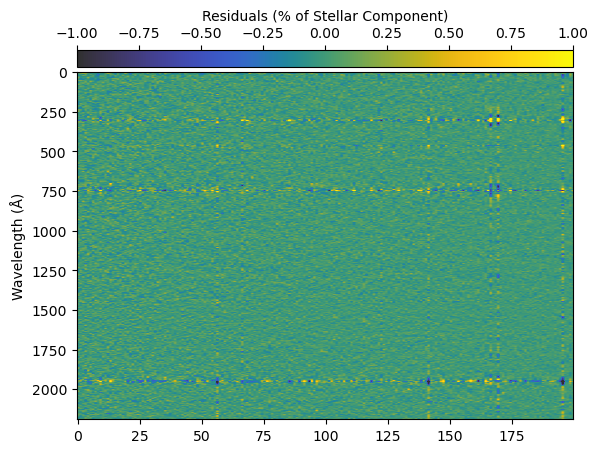

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

median_subtracted_residuals = residuals'[star_msk,:] .- median(residuals[:,star_msk],dims =1)'

img = ax.imshow(median_subtracted_residuals,
    cmap="cet_gouldian",
    aspect="auto",
    vmin=-1,
    vmax=1,
    # extent=(0,200,775,750),
    # extent=(0,size(sorted_residuals',2),maxw,minw),
)
# plt.ylim(750,775)
# plt.xlabel("Noise level")
plt.ylabel("Wavelength (Å)")

divider = mpltk.make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
cbar = plt.colorbar(img, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cax.set_xlabel("Residuals (% of Stellar Component)")
plt.show()

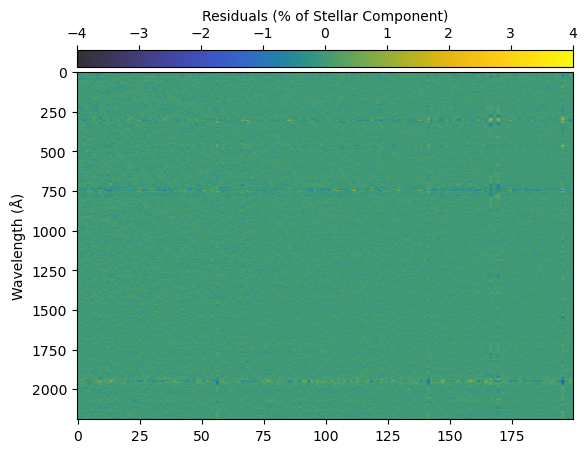

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

median_subtracted_residuals = residuals'[star_msk,:] .- median(residuals[:,star_msk],dims =1)'

img = ax.imshow(residuals'[star_msk,:],
    cmap="cet_gouldian",
    aspect="auto",
    vmin=-4,
    vmax=4,
    # extent=(0,200,775,750),
    # extent=(0,size(sorted_residuals',2),maxw,minw),
)
# plt.ylim(750,775)
# plt.xlabel("Noise level")
plt.ylabel("Wavelength (Å)")

divider = mpltk.make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
cbar = plt.colorbar(img, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cax.set_xlabel("Residuals (% of Stellar Component)")
plt.show()

In [40]:
mu_cd_down = h5read(andrew_dir*"support/binned_resid.h5","μ_cd_down");
stellar_snr = h5read(andrew_dir*"support/binned_resid.h5","stellar_SNR");

In [42]:
size(stellar_snr)

(2039,)

In [21]:
files_arr = []

for (root, dirs, files) in walkdir("../test_gaia_data_circshift1/")
    files_arr = joinpath.(root, files)
    break
    # operate_on_files(joinpath.(root, files)) # files is a Vector{String}, can be empty
end

noises = []
residuals = []
sample_means = []
stellar_components = []
for file in files_arr
    μ_cd_mat_random = h5read(file,"μ_cd");
    μ_bd_mat_random = h5read(file,"μ_bd");
    # print(μ_cd_mat_random)
    # print((isnan(μ_bd_mat_random)))
    # noise_factors = h5read(file,"noise_factor");
    # sample_mean = h5read(file,"sampleMean");
    batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;
    # print(size(batch_residuals))
    # batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;

    # println(size(batch_residuals)," ", size(noise_factors))
    # noises = cat(noises, noise_factors, dims = 1)
    residuals = cat(residuals, batch_residuals', dims = 1)
    stellar_components = cat(stellar_components, μ_bd_mat_random', dims = 1)
    # sample_means = cat(sample_means, sample_mean, dims = 1)
end

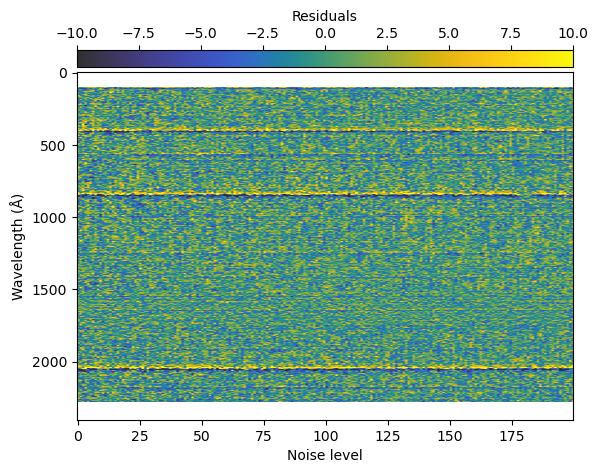

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

img = ax.imshow(residuals',
    cmap="cet_gouldian",
    aspect="auto",
    vmin=-10,
    vmax=10,
    # extent=(minimum(noises), maximum(noises),maxw,minw),
    # extent=(0,size(sorted_residuals',2),maxw,minw),
)
plt.xlabel("Noise level")
plt.ylabel("Wavelength (Å)")

divider = mpltk.make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
cbar = plt.colorbar(img, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
# cax.set_xlabel("Residuals (% of Stellar Component)")
cax.set_xlabel("Residuals")

plt.show()

In [46]:
size(sorted_residuals')

(2189, 3000)

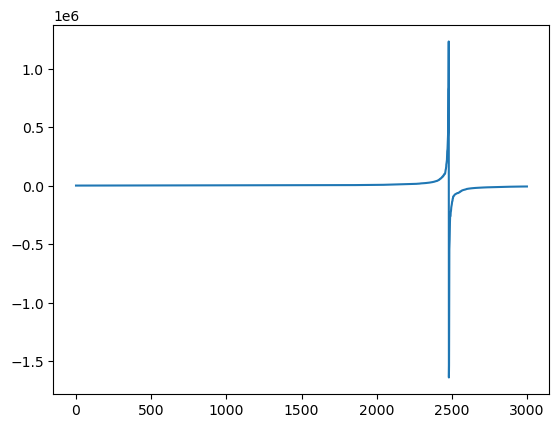

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14ab82feed40>

In [45]:
plot(sorted_residuals'[1954,:])

In [43]:
argmax(sorted_residuals'[:,1500])

1954

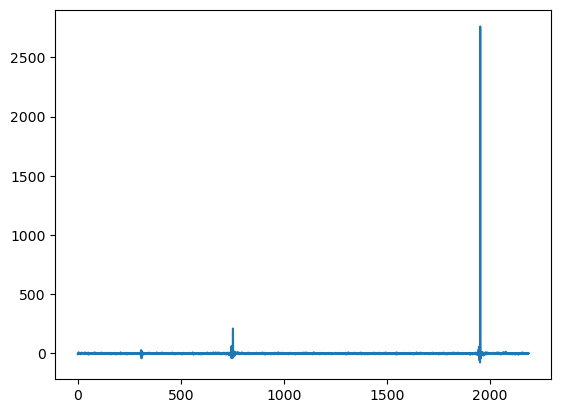

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14ab82f92470>

In [41]:
plot(sorted_residuals'[:,1500])

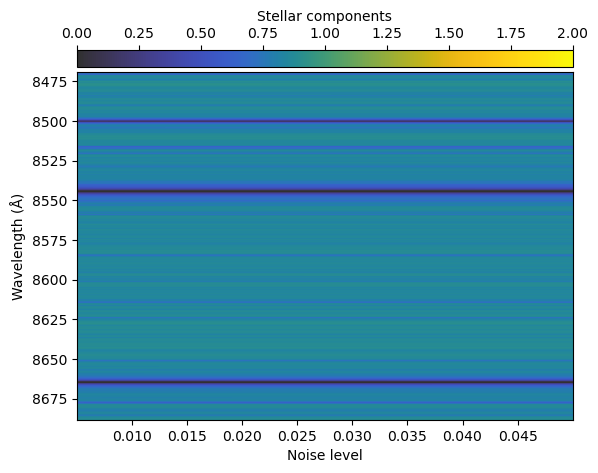

In [129]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

img = ax.imshow(sorted_stellar_components',
    cmap="cet_gouldian",
    aspect="auto",
    vmin=0,
    vmax=2,
    extent=(minimum(noises), maximum(noises),maxw,minw),
    # extent=(0,size(sorted_residuals',2),maxw,minw),
)
plt.xlabel("Noise level")
plt.ylabel("Wavelength (Å)")

divider = mpltk.make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
cbar = plt.colorbar(img, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cax.set_xlabel("Stellar components")
plt.show()

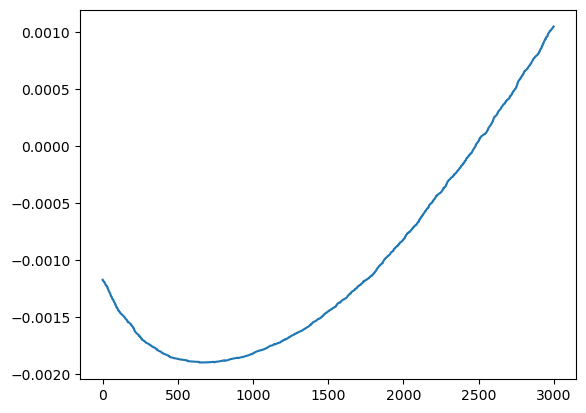

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14ab823b5780>

In [47]:
plot(sorted_stellar_components'[1954,:])

Randomly generating 3000 signals

In [35]:
files_arr = []

for (root, dirs, files) in walkdir("../dust_on_const_signal_2_half/")
    files_arr = joinpath.(root, files)
    break
    # operate_on_files(joinpath.(root, files)) # files is a Vector{String}, can be empty
end

In [36]:
noises = []
residuals = []
sample_means = []
stellar_components = []
for file in files_arr
    μ_cd_mat_random = h5read(file,"μ_cd");
    μ_bd_mat_random = h5read(file,"μ_bd");
    # print(μ_cd_mat_random)
    # print((isnan(μ_bd_mat_random)))
    # noise_factors = h5read(file,"noise_factor");
    # sample_mean = h5read(file,"sampleMean");
    batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;
    # print(size(batch_residuals))
    # batch_residuals = 100 .*μ_cd_mat_random./μ_bd_mat_random;

    # println(size(batch_residuals)," ", size(noise_factors))
    # noises = cat(noises, noise_factors, dims = 1)
    residuals = cat(residuals, batch_residuals', dims = 1)
    stellar_components = cat(stellar_components, μ_bd_mat_random', dims = 1)
    # sample_means = cat(sample_means, sample_mean, dims = 1)
end

In [37]:
noises = h5read("test_data_const_signal_2_half.h5","noise_factor");

ps1 = sortperm(noises);
println(size(ps1))
sorted_noises = noises[ps1];

sorted_residuals = residuals[ps1,star_msk];
sorted_stellar_components = stellar_components[ps1, star_msk];

(300,)


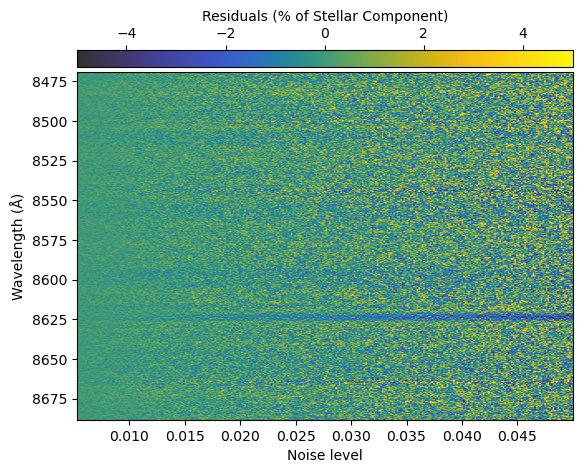

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

img = ax.imshow(sorted_residuals',
    cmap="cet_gouldian",
    aspect="auto",
    vmin=-5,
    vmax=5,
    extent=(minimum(noises), maximum(noises),maxw,minw),
    # extent=(0,size(sorted_residuals',2),maxw,minw),
)
plt.xlabel("Noise level")
plt.ylabel("Wavelength (Å)")

divider = mpltk.make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
cbar = plt.colorbar(img, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cax.set_xlabel("Residuals (% of Stellar Component)")
plt.show()

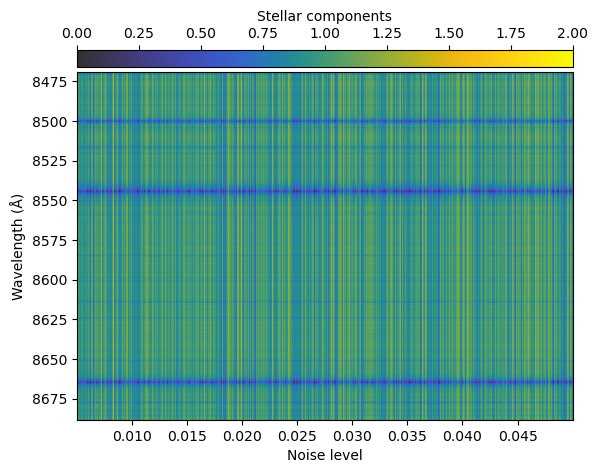

In [138]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

img = ax.imshow(sorted_stellar_components',
    cmap="cet_gouldian",
    aspect="auto",
    vmin=0,
    vmax=2,
    extent=(minimum(noises), maximum(noises),maxw,minw),
    # extent=(0,size(sorted_residuals',2),maxw,minw),
)
plt.xlabel("Noise level")
plt.ylabel("Wavelength (Å)")

divider = mpltk.make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
cbar = plt.colorbar(img, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cax.set_xlabel("Stellar components")
plt.show()

-----

In [12]:
μ_cd_mat_random = h5read("../dust_on/deblend_scan_0000041.h5","μ_cd");
μ_bd_mat_random = h5read("../dust_on/deblend_scan_0000041.h5","μ_bd");

# print((μ_cd_mat_random))

noises = h5read("test_data.h5","noise_factor");

ps1 = sortperm(noises);
sorted_noises = noises[ps1];


μ_cd_sort_random = μ_cd_mat_random[star_msk,:][:,ps1];
μ_bd_sort_random = μ_bd_mat_random[star_msk,:][:,ps1];

μ_cd_down_random = 100 .*μ_cd_sort_random./μ_bd_sort_random;

LoadError: BoundsError: attempt to access 2189×40 Matrix{Float64} at index [1:2189, [855, 1185, 2546, 139, 672, 2443, 2823, 608, 1790, 896  …  1562, 620, 1971, 1712, 707, 2256, 2103, 2080, 2394, 591]]

In [114]:
size(noises)

(40,)

In [115]:
size(μ_cd_down_random)

(2189, 40)

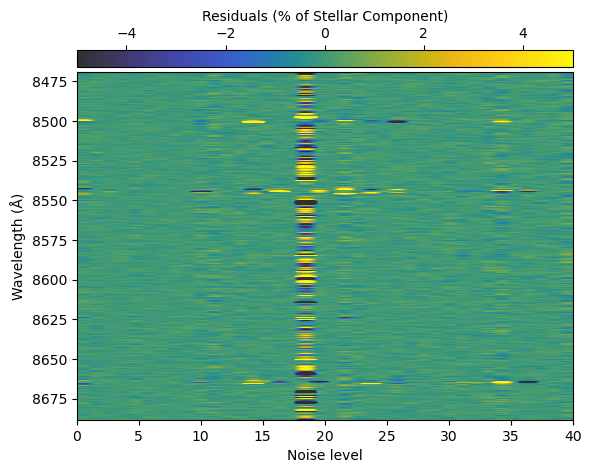

In [122]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

img = ax.imshow(μ_cd_down_random[:,2:end-1],
    cmap="cet_gouldian",
    aspect="auto",
    vmin=-5,
    vmax=5,
    # extent=(minimum(noises), maximum(noises),maxw,minw),
    extent=(0,size(μ_cd_down_random,2),maxw,minw),
)
plt.xlabel("Noise level")
plt.ylabel("Wavelength (Å)")

divider = mpltk.make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
cbar = plt.colorbar(img, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
cax.set_xlabel("Residuals (% of Stellar Component)")
plt.show()